In [14]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.append("models/")
from notebooks_funs import *



In [15]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



from models import generators,layers




importlib.reload(layers)
importlib.reload(generators)
#importlib.reload(discriminators)

from layers import *



import utils
importlib.reload(utils)

from utils import *

filename = '../Exps/wall_v2/241_D_patch_dch64_nld4_G_patch2D_gch52_nlg6_npatches3x3_randomcrop192_n_cl1_originalspade_overlappad4_indmaps_overlappadconv_residual_FCG'

checkpoint = torch.load(filename+'/600_250.pth',map_location='cpu')

args = checkpoint['args']

netG = generators.Res_Generator(args, n_classes =args.n_cl).to(device)
netG = load_G(checkpoint,netG)


4247 6539
Output resolution:  2176 2176


(-0.5, 2175.5, 2175.5, -0.5)

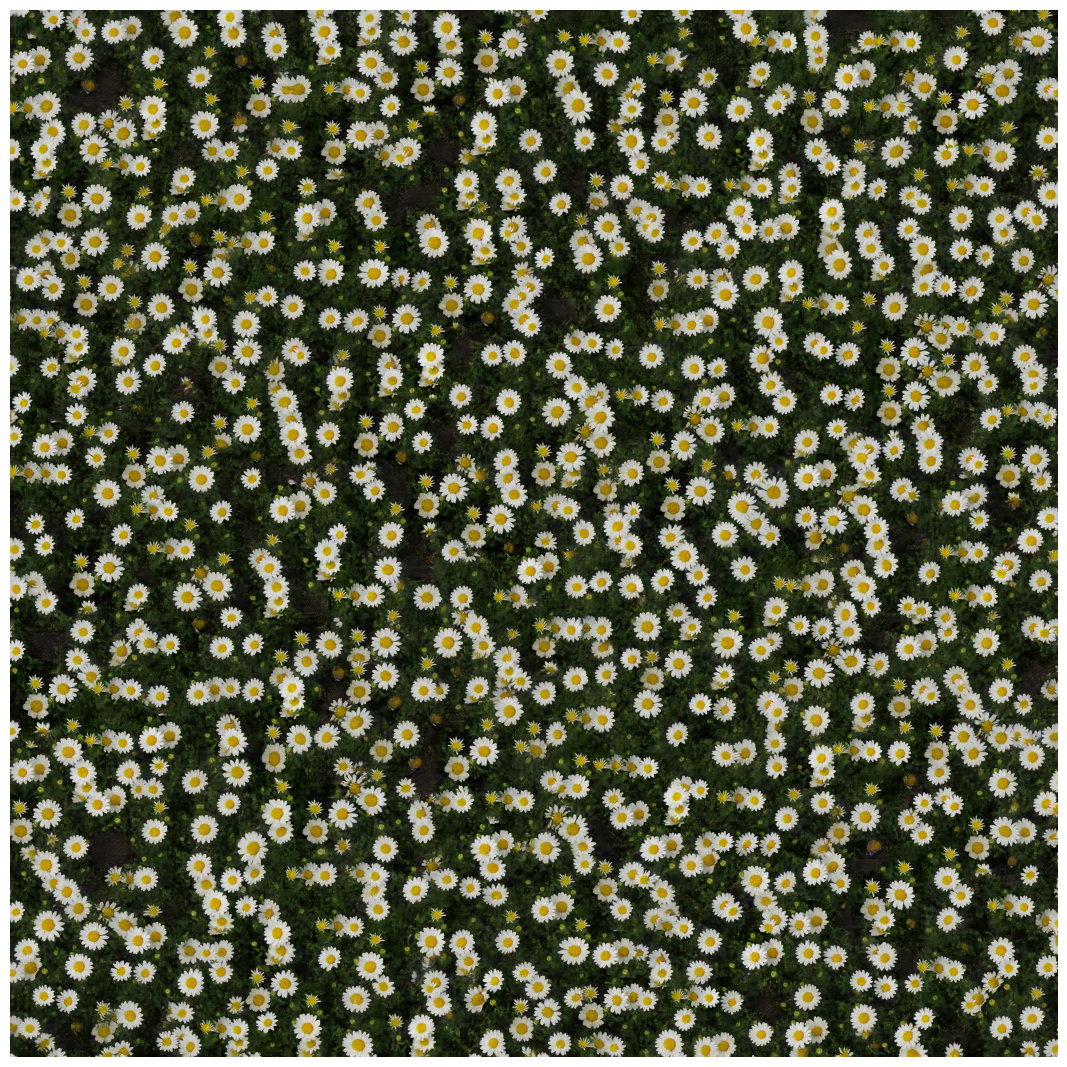

In [17]:

ts = np.random.randint(0,10000)
ns = np.random.randint(0,10000)


print(ts,ns)
torch.manual_seed(ts)
np.random.seed(ns)

netG = generators.Res_Generator(args, n_classes =args.n_cl).to(device)
netG = load_G(checkpoint,netG)

# specify the size of the output image by setting the number of patches in both directions
# output resolution = h*gen_res X w*gen_res
h = args.num_patches_h
w = args.num_patches_w
h = 17
w = 17
N = 1
gen_res = (2**(args.n_layers_G-1))*args.base_res
print('Output resolution: ', h*gen_res,w*gen_res)
#before = time.time()



with torch.no_grad():
    full_img = utils.scale_2D(args,netG,n_imgs = N,h=h,w=w,device =device)

#print(f'CPU {time.time() - before:.5f}') # output: CPU 0.00066

mult = 0.8

#Nx = 1
#Ny = 2
 
 
fig2, axes = plt.subplots(1,1,figsize=(mult*w,mult*h))
im_np = full_img[0].permute(1, 2, 0).numpy()*0.5+0.5
#im_np = np.round(im_np)

plt.imshow(im_np)
axes.axis('off')

#plt.savefig('241_ex.pdf',bbox_inches='tight',pad_inches = 0)